# Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import math
from PIL import Image
import os
import math
import cv2
import glob
from skimage.filters import gaussian
from skimage import img_as_ubyte
import xlsxwriter
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Uploading the zip form of the dataset(Mango) and unzipping it
!unzip Mango.zip
#To download the zipped version the mango folder after processing
# !zip -r /content/Mango.zip /content/Mango
# files.download("/content/Mango.zip")

Archive:  Mango.zip
   creating: Mango/
   creating: Mango/ARTIFICIALLY_RIPENED/
  inflating: Mango/ARTIFICIALLY_RIPENED/17264ecc-2013-43be-9431-5fc08563e953.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/1c319e7b-f8a8-4bb8-b318-338a7139d745.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/25496f19-9ee2-45e1-8a44-a12060c88033.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/33e48eaf-8f2c-4446-b0e4-610ae3dd3d19.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/369775ae-ddda-4a1e-af44-791ad7748fdf.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/4685d6ec-9c32-4589-8ac5-47c533113b39.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/5fac5468-50b8-4ba2-838d-2300c1909e9f.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/64a242c6-eee2-4d03-8724-acd23928910d.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/8086cd27-63c4-498b-8106-2ab9b72c1ff3.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/89d44070-c451-420b-acb3-e3dd24c4d156.jpg  
  inflating: Mango/ARTIFICIALLY_RIPENED/a253ada2-2ce2-470d-94f2-7f9c8ea292fa.jpg  
  infl

# Renaming Image File Names:

In [ ]:
def rename_art():
    for count, filename in enumerate(os.listdir("/content/Mango/ARTIFICIALLY_RIPENED/")):
        dst ="Artificial" + str(count) + ".jpg"
        src ='/content/Mango/ARTIFICIALLY_RIPENED/'+ filename
        dst ='/content/Mango/ARTIFICIALLY_RIPENED/'+ dst
        os.rename(src, dst)

In [ ]:
def rename_nat():
    for count, filename in enumerate(os.listdir("/content/Mango/NATURALLY_RIPENED/")):
        dst ="Natural" + str(count) + ".jpg"
        src ='/content/Mango/NATURALLY_RIPENED/'+ filename
        dst ='/content/Mango/NATURALLY_RIPENED/'+ dst
        os.rename(src, dst)

In [ ]:
#Renaming the images
rename_art()
rename_nat()

# Converting into Gray Scale image and Resizing it

In [ ]:
path = "/content/Mango/ARTIFICIALLY_RIPENED/*.*"
NEW_SIZE = (96,96)
i=0
for file in glob.glob(path):
  img=Image.open(file)
  print("Aritifical Mango Image",i,":")
  print("Original Size :",end=" ")
  print(img.size,end="  ")
  imgGray=img.convert('L')
  print("Resize :",end=" ")
  img1 = imgGray.resize(NEW_SIZE)
  print(img1.size)
  img1.save(f'/content/Mango/GrayScale_Resized(Arti)/art_image_{i}.jpg')
  i+=1

Aritifical Mango Image 0 :
Original Size : (1040, 780)  Resize : (96, 96)
Aritifical Mango Image 1 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 2 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 3 :
Original Size : (1040, 780)  Resize : (96, 96)
Aritifical Mango Image 4 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 5 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 6 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 7 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 8 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 9 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 10 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 11 :
Original Size : (780, 1040)  Resize : (96, 96)
Aritifical Mango Image 12 :
Original Size : (1040, 780)  Resize : (96, 96)
Aritifical Mango Image 13 :
Origina

In [ ]:
path = "/content/Mango/NATURALLY_RIPENED/*.*"
NEW_SIZE = (96,96)
i=0
for file in glob.glob(path):
  img=Image.open(file)
  print("Natural Mango Image",i,":")
  print("Original Size :",end=" ")
  print(img.size,end="  ")
  imgGray=img.convert('L')
  #print(imgGray.size)
  print("Resize :",end=" ")
  img1 = imgGray.resize(NEW_SIZE)
  print(img1.size)
  img1.save(f'/content/Mango/GrayScale_Resized(Nat)/nat_image_{i}.jpg')
  i+=1

Natural Mango Image 0 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 1 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 2 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 3 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 4 :
Original Size : (1040, 780)  Resize : (96, 96)
Natural Mango Image 5 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 6 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 7 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 8 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 9 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 10 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 11 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 12 :
Original Size : (780, 1040)  Resize : (96, 96)
Natural Mango Image 13 :
Original Size : (780, 1040)  Resize : (96, 96)
Na

# Extracting pixel values and storing in a Excel File


In [ ]:
workbook = xlsxwriter.Workbook('/content/Mango/data1.xlsx')
worksheet = workbook.add_worksheet()
row=0
column=0

In [ ]:
path = "/content/Mango/GrayScale_Resized(Arti)/*.*"
for file in glob.glob(path):
  img=Image.open(file)
  pixels=np.array(img)
  pix=pixels.flatten()
  pix_lst=pix.tolist()
  worksheet.write_row(row, column, pix_lst)
  row+=1
  print(pix)
workbook.close()

[37 37 38 ... 34 34 33]
[40 40 40 ... 19 19 19]
[29 34 43 ... 25 25 25]
[44 44 45 ... 16 16 16]
[39 39 39 ... 35 34 34]
[39 39 39 ... 22 22 22]
[36 36 36 ... 27 27 27]
[35 35 36 ... 45 45 45]
[43 43 43 ... 21 21 21]
[38 39 40 ... 37 37 37]
[38 38 38 ... 17 17 17]
[34 34 34 ... 29 28 28]
[37 38 38 ... 28 28 29]
[37 37 37 ... 33 33 33]


In [ ]:
df1 = pd.read_excel('/content/Mango/data1.xlsx',header=None)
col = [*range(0, 9216, 1)]
features = ["X" + str(a) for a in col]
df1 = df1.set_axis(features, axis=1, inplace=False)
df1.loc[:,'Y']=0
df1.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X9177,X9178,X9179,X9180,X9181,X9182,X9183,X9184,X9185,X9186,X9187,X9188,X9189,X9190,X9191,X9192,X9193,X9194,X9195,X9196,X9197,X9198,X9199,X9200,X9201,X9202,X9203,X9204,X9205,X9206,X9207,X9208,X9209,X9210,X9211,X9212,X9213,X9214,X9215,Y
0,37,37,38,39,39,40,40,40,43,43,43,44,44,45,45,45,45,45,45,46,46,46,47,47,47,47,47,47,47,47,47,47,46,46,45,45,45,44,44,44,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,36,36,36,37,37,37,37,37,36,35,35,34,33,33,36,36,36,35,35,34,34,33,0
1,40,40,40,41,41,41,42,42,42,42,43,43,44,45,46,46,47,47,47,47,47,47,47,47,46,46,46,46,45,44,43,42,37,52,43,29,73,158,203,196,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0
2,29,34,43,51,56,56,54,52,50,50,50,51,51,51,52,52,54,54,54,53,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,...,27,27,26,26,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0
3,44,44,45,46,46,47,47,48,48,50,52,53,53,53,56,58,58,58,58,57,57,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,...,10,11,11,12,12,13,13,13,14,14,14,14,13,12,12,13,13,14,14,14,15,15,15,15,16,16,17,17,16,16,15,16,16,16,16,16,16,16,16,0
4,39,39,39,40,40,41,41,41,42,42,42,43,43,44,44,44,45,45,45,46,46,46,47,47,48,48,48,48,48,48,48,48,48,48,48,47,47,46,46,46,...,37,37,37,37,37,37,37,35,35,35,35,35,35,35,35,37,38,38,38,39,39,39,39,39,39,38,38,38,38,38,38,38,37,37,36,35,35,34,34,0


In [ ]:
workbook = xlsxwriter.Workbook('/content/Mango/data2.xlsx')
worksheet = workbook.add_worksheet()
row=0
column=0

In [ ]:
path = "/content/Mango/GrayScale_Resized(Nat)/*.*"
for file in glob.glob(path):
  img=Image.open(file)
  pixels=np.array(img)
  pix=pixels.flatten()
  pix_lst=pix.tolist()
  worksheet.write_row(row, column, pix_lst)
  row+=1
  print(pix)
workbook.close()

[ 91  77 109 ...  66  76  60]
[37 38 39 ... 28 28 28]
[139 162 148 ... 149 149 151]
[29 29 29 ... 23 23 23]
[ 41  67  82 ... 114 116 113]
[28 28 28 ... 17 17 17]
[60 63 67 ... 52 33 38]
[23 23 23 ... 19 19 18]
[31 31 31 ... 30 29 28]
[137 117 111 ...  81  80  80]
[29 29 29 ... 19 18 18]
[30 30 30 ... 19 19 19]
[32 33 34 ... 30 29 29]
[48 53 60 ... 46 57 31]
[ 56  52  47 ... 147 136 126]
[ 30  31  40 ... 123 120 102]
[158 161 164 ...  89  87  86]
[ 59  52  51 ... 148 147 145]
[30 30 31 ... 20 20 20]
[116 103 112 ...  71  67  63]
[31 31 32 ... 18 18 18]
[ 92 117 126 ...  50  56  76]
[174 175 176 ...  89  85  84]
[ 58  66  69 ...  99 102 104]
[34 34 34 ... 30 29 29]
[24 24 24 ... 24 22 21]
[24 24 24 ... 22 22 22]
[173 173 175 ...  97  96  95]
[ 47  48  49 ...  91 107 107]
[27 27 28 ... 82 83 88]
[23 23 23 ... 18 17 16]
[165 167 171 ...  52  62  69]
[173 155 143 ...  62  50  70]
[45 42 40 ... 36 38 35]
[19 19 21 ... 99 92 96]
[27 27 27 ... 23 23 23]
[ 67  67  66 ... 105 110 107]
[37 37 37 

In [ ]:
df2 = pd.read_excel('/content/Mango/data2.xlsx',header=None)
col = [*range(0, 9216, 1)]
features = ["X" + str(a) for a in col]
df2 = df2.set_axis(features, axis=1, inplace=False)
df2.loc[:,'Y']=1
df2.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X9177,X9178,X9179,X9180,X9181,X9182,X9183,X9184,X9185,X9186,X9187,X9188,X9189,X9190,X9191,X9192,X9193,X9194,X9195,X9196,X9197,X9198,X9199,X9200,X9201,X9202,X9203,X9204,X9205,X9206,X9207,X9208,X9209,X9210,X9211,X9212,X9213,X9214,X9215,Y
0,91,77,109,125,113,95,96,147,165,162,154,151,155,152,129,102,114,132,149,145,119,96,94,103,111,118,93,63,53,37,22,28,23,25,28,30,31,33,33,34,...,174,175,166,156,152,152,152,143,152,155,192,181,131,146,172,162,183,162,165,168,96,45,63,64,54,41,29,21,14,12,13,32,51,64,92,85,66,76,60,1
1,37,38,39,40,41,41,41,41,39,40,41,42,44,45,46,46,46,46,46,46,46,46,46,46,49,49,49,50,50,51,51,51,51,51,51,52,52,53,53,53,...,28,28,28,28,28,28,28,31,31,31,31,31,31,31,31,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,28,28,28,28,28,28,28,28,1
2,139,162,148,133,151,153,143,154,154,138,101,83,97,92,74,74,68,69,73,76,74,72,77,85,67,62,74,96,100,90,97,116,108,138,170,179,166,153,154,162,...,37,40,52,70,75,56,31,24,21,20,18,13,12,22,35,23,24,59,71,99,61,62,102,123,125,115,107,59,49,119,152,154,154,154,152,150,149,149,151,1
3,29,29,29,30,30,31,31,31,31,31,32,33,33,34,35,35,36,36,36,37,37,38,38,38,40,40,40,41,41,42,42,42,41,41,41,40,40,39,39,39,...,16,16,17,17,18,18,18,18,18,18,19,19,20,20,20,20,20,20,21,21,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,1
4,41,67,82,75,70,77,76,65,63,60,56,53,51,48,45,43,49,47,46,47,49,51,51,51,46,46,46,45,43,41,39,38,44,53,51,44,43,36,30,34,...,72,77,78,77,75,75,76,98,84,77,85,94,92,84,79,76,91,105,106,105,105,104,100,92,91,93,98,99,99,104,112,122,116,108,102,105,114,116,113,1


In [ ]:
df=df1.append(df2, ignore_index = True)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X9177,X9178,X9179,X9180,X9181,X9182,X9183,X9184,X9185,X9186,X9187,X9188,X9189,X9190,X9191,X9192,X9193,X9194,X9195,X9196,X9197,X9198,X9199,X9200,X9201,X9202,X9203,X9204,X9205,X9206,X9207,X9208,X9209,X9210,X9211,X9212,X9213,X9214,X9215,Y
0,37,37,38,39,39,40,40,40,43,43,43,44,44,45,45,45,45,45,45,46,46,46,47,47,47,47,47,47,47,47,47,47,46,46,45,45,45,44,44,44,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,36,36,36,37,37,37,37,37,36,35,35,34,33,33,36,36,36,35,35,34,34,33,0
1,40,40,40,41,41,41,42,42,42,42,43,43,44,45,46,46,47,47,47,47,47,47,47,47,46,46,46,46,45,44,43,42,37,52,43,29,73,158,203,196,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0
2,29,34,43,51,56,56,54,52,50,50,50,51,51,51,52,52,54,54,54,53,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,...,27,27,26,26,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0
3,44,44,45,46,46,47,47,48,48,50,52,53,53,53,56,58,58,58,58,57,57,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,...,10,11,11,12,12,13,13,13,14,14,14,14,13,12,12,13,13,14,14,14,15,15,15,15,16,16,17,17,16,16,15,16,16,16,16,16,16,16,16,0
4,39,39,39,40,40,41,41,41,42,42,42,43,43,44,44,44,45,45,45,46,46,46,47,47,48,48,48,48,48,48,48,48,48,48,48,47,47,46,46,46,...,37,37,37,37,37,37,37,35,35,35,35,35,35,35,35,37,38,38,38,39,39,39,39,39,39,38,38,38,38,38,38,38,37,37,36,35,35,34,34,0


In [ ]:
file_name = '/content/Mango/Data.xlsx'
df.to_excel(file_name)

In [ ]:
df=pd.read_excel("/content/Mango/Data.xlsx",index_col=0)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X9177,X9178,X9179,X9180,X9181,X9182,X9183,X9184,X9185,X9186,X9187,X9188,X9189,X9190,X9191,X9192,X9193,X9194,X9195,X9196,X9197,X9198,X9199,X9200,X9201,X9202,X9203,X9204,X9205,X9206,X9207,X9208,X9209,X9210,X9211,X9212,X9213,X9214,X9215,Y
0,37,37,38,39,39,40,40,40,43,43,43,44,44,45,45,45,45,45,45,46,46,46,47,47,47,47,47,47,47,47,47,47,46,46,45,45,45,44,44,44,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,36,36,36,37,37,37,37,37,36,35,35,34,33,33,36,36,36,35,35,34,34,33,0
1,40,40,40,41,41,41,42,42,42,42,43,43,44,45,46,46,47,47,47,47,47,47,47,47,46,46,46,46,45,44,43,42,37,52,43,29,73,158,203,196,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0
2,29,34,43,51,56,56,54,52,50,50,50,51,51,51,52,52,54,54,54,53,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,...,27,27,26,26,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0
3,44,44,45,46,46,47,47,48,48,50,52,53,53,53,56,58,58,58,58,57,57,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,...,10,11,11,12,12,13,13,13,14,14,14,14,13,12,12,13,13,14,14,14,15,15,15,15,16,16,17,17,16,16,15,16,16,16,16,16,16,16,16,0
4,39,39,39,40,40,41,41,41,42,42,42,43,43,44,44,44,45,45,45,46,46,46,47,47,48,48,48,48,48,48,48,48,48,48,48,47,47,46,46,46,...,37,37,37,37,37,37,37,35,35,35,35,35,35,35,35,37,38,38,38,39,39,39,39,39,39,38,38,38,38,38,38,38,37,37,36,35,35,34,34,0


In [ ]:
df.shape

(55, 9217)

# EDA:

In [ ]:
print("Artificially Ripened:",len(df[df['Y']==0]))
print("Naturally Ripened:",len(df[df['Y']==1]))

Artificially Ripened: 14
Naturally Ripened: 41


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


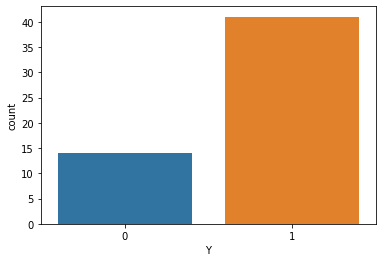

In [ ]:
ax=sns.countplot(df['Y'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Columns: 9217 entries, X0 to Y
dtypes: int64(9217)
memory usage: 3.9 MB


In [ ]:
df.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X9177,X9178,X9179,X9180,X9181,X9182,X9183,X9184,X9185,X9186,X9187,X9188,X9189,X9190,X9191,X9192,X9193,X9194,X9195,X9196,X9197,X9198,X9199,X9200,X9201,X9202,X9203,X9204,X9205,X9206,X9207,X9208,X9209,X9210,X9211,X9212,X9213,X9214,X9215,Y
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,60.600000,61.000000,62.490909,63.200000,63.000000,63.200000,63.890909,66.309091,67.527273,65.327273,62.145455,61.254545,62.363636,62.636364,61.854545,61.527273,62.945455,63.254545,63.218182,62.254545,61.381818,61.436364,61.218182,61.400000,61.236364,61.145455,60.400000,60.290909,59.581818,58.600000,58.745455,59.363636,59.418182,60.709091,61.381818,61.490909,63.309091,65.727273,66.163636,65.963636,...,57.654545,58.418182,57.909091,59.436364,59.163636,58.127273,58.581818,57.800000,56.945455,56.727273,56.527273,56.909091,55.963636,57.254545,56.345455,55.236364,53.872727,54.236364,54.018182,53.854545,51.127273,50.254545,50.927273,54.309091,56.236364,55.709091,54.163636,51.690909,51.181818,50.836364,51.836364,53.854545,54.381818,53.909091,53.763636,55.927273,55.854545,56.272727,56.690909,0.745455
std,47.184272,46.671825,46.781158,46.319103,46.620612,45.970764,45.939442,48.829967,50.827542,48.883101,47.649732,48.077568,48.447514,48.457833,47.434328,46.639220,46.913403,45.331380,45.581303,45.177108,43.818857,42.171503,41.265487,41.364057,41.977932,42.892380,41.536062,40.876360,40.998957,41.381961,42.658948,44.187045,43.387868,44.753097,46.028772,45.681211,45.108869,48.183467,50.813662,51.588817,...,58.422224,57.896680,55.629819,56.542270,56.168649,55.608104,56.384162,55.804354,56.542484,56.280532,57.425912,56.540144,53.888762,53.421531,51.651330,51.258229,48.868703,44.294454,43.493504,43.589167,38.597666,37.833073,37.497582,43.460443,48.145214,47.791473,48.248878,49.896141,48.940664,46.969164,47.354754,46.637855,45.426983,43.709170,41.840510,42.157928,42.313827,42.309904,43.227594,0.439620
min,19.000000,19.000000,21.000000,24.000000,24.000000,25.000000,25.000000,25.000000,26.000000,21.000000,19.000000,13.000000,13.000000,18.000000,16.000000,13.000000,24.000000,24.000000,24.000000,25.000000,22.000000,26.000000,26.000000,26.000000,29.000000,11.000000,13.000000,30.000000,27.000000,18.000000,22.000000,25.000000,23.000000,23.000000,22.000000,28.000000,31.000000,33.000000,28.000000,19.000000,...,10.000000,11.000000,11.000000,11.000000,12.000000,13.000000,13.000000,13.000000,14.000000,12.000000,11.000000,13.000000,12.000000,12.000000,12.000000,8.000000,13.000000,14.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,17.000000,4.000000,14.000000,12.000000,11.000000,11.000000,16.000000,14.000000,16.000000,16.000000,16.000000,16.000000,16.000000,0.000000
25%,30.500000,31.000000,33.000000,34.000000,34.500000,35.500000,35.500000,35.500000,36.000000,36.000000,34.000000,33.500000,33.500000,34.500000,36.000000,36.000000,36.000000,37.000000,37.000000,37.000000,37.000000,39.000000,39.000000,39.000000,40.000000,40.000000,40.000000,40.500000,40.000000,41.000000,40.000000,40.500000,39.500000,40.500000,40.500000,40.000000,40.000000,39.00

In [ ]:
cov_mat=df.cov()
print(cov_mat)

                X0           X1  ...        X9215         Y
X0     2226.355556  2172.351852  ...  1150.725926  5.970370
X1     2172.351852  2178.259259  ...  1188.000000  5.944444
X2     2154.959259  2164.925926  ...  1182.302694  6.090236
X3     2113.044444  2114.185185  ...  1164.137037  5.922222
X4     2102.055556  2111.148148  ...  1198.148148  5.777778
...            ...          ...  ...          ...       ...
X9212  1029.748148  1054.148148  ...  1677.514141  7.258923
X9213   951.551852   993.055556  ...  1715.880135  7.295623
X9214  1001.851852  1043.574074  ...  1778.474747  7.441077
X9215  1150.725926  1188.000000  ...  1868.624916  7.549495
Y         5.970370     5.944444  ...     7.549495  0.193266

[9217 rows x 9217 columns]


In [ ]:
corr=df.corr()
corr

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X9177,X9178,X9179,X9180,X9181,X9182,X9183,X9184,X9185,X9186,X9187,X9188,X9189,X9190,X9191,X9192,X9193,X9194,X9195,X9196,X9197,X9198,X9199,X9200,X9201,X9202,X9203,X9204,X9205,X9206,X9207,X9208,X9209,X9210,X9211,X9212,X9213,X9214,X9215,Y
X0,1.000000,0.986457,0.976272,0.966832,0.955584,0.960524,0.954090,0.927746,0.905545,0.885361,0.849262,0.819757,0.810495,0.796432,0.806309,0.830707,0.829200,0.812605,0.786944,0.771439,0.775797,0.781544,0.763962,0.767104,0.731412,0.709441,0.714358,0.720573,0.705844,0.659263,0.641407,0.651757,0.637305,0.652657,0.659814,0.661006,0.642578,0.572669,0.541386,0.541008,...,0.658763,0.680000,0.728612,0.718108,0.723388,0.718273,0.673013,0.655635,0.642087,0.652601,0.650913,0.646536,0.658538,0.706280,0.712895,0.730227,0.706928,0.765507,0.744071,0.786065,0.791294,0.831694,0.766976,0.645729,0.551792,0.526948,0.521253,0.448634,0.458290,0.470410,0.472705,0.483711,0.510217,0.523980,0.518582,0.517672,0.476599,0.501839,0.564175,0.287824
X1,0.986457,1.000000,0.991556,0.977976,0.970255,0.971525,0.964275,0.941290,0.922384,0.904009,0.865230,0.833184,0.830647,0.821144,0.825378,0.841184,0.835058,0.822747,0.803786,0.792138,0.797550,0.802191,0.780381,0.780085,0.743373,0.729162,0.732960,0.737800,0.720651,0.670891,0.655896,0.664696,0.651132,0.671006,0.681770,0.683518,0.662143,0.585923,0.550894,0.550192,...,0.645761,0.668728,0.717091,0.711020,0.720603,0.714609,0.664951,0.653814,0.632724,0.637425,0.637597,0.637123,0.640417,0.672318,0.690313,0.693300,0.684476,0.780593,0.761414,0.816017,0.819599,0.843305,0.799984,0.682629,0.585737,0.557088,0.547053,0.459571,0.462008,0.488666,0.498914,0.506558,0.530070,0.539582,0.533553,0.535757,0.502848,0.528477,0.588844,0.289720
X2,0.976272,0.991556,1.000000,0.991702,0.975867,0.968863,0.961048,0.953137,0.940367,0.925390,0.890557,0.859208,0.857509,0.850723,0.849535,0.852245,0.849151,0.845748,0.836499,0.825600,0.824284,0.823288,0.800046,0.800102,0.770102,0.759068,0.752606,0.743476,0.721644,0.668308,0.648655,0.654831,0.642364,0.659070,0.665305,0.664457,0.644393,0.570303,0.534100,0.532301,...,0.679610,0.703722,0.751673,0.742167,0.752202,0.750487,0.703901,0.695262,0.673339,0.677534,0.687399,0.688034,0.679806,0.703863,0.730312,0.726900,0.734415,0.824942,0.797765,0.854576,0.849852,0.853221,0.812398,0.689938,0.591050,0.559777,0.540652,0.451050,0.452881,0.470258,0.476669,0.490630,0.518258,0.527693,0.533407,0.535359,0.502448,0.533143,0.584651,0.296132
X3,0.966832,0.977976,0.991702,1.000000,0.990704,0.978321,0.972656,0.969874,0.954525,0.942491,0.917517,0.896003,0.895605,0.885984,0.883908,0.886698,0.887178,0.884657,0.874144,0.859598,0.854807,0.854774,0.833503,0.833353,0.806316,0.789228,0.777183,0.764337,0.741952,0.689810,0.670299,0.677783,0.666055,0.681353,0.684025,0.681193,0.662821,0.589057,0.551998,0.550262,...,0.654680,0.679210,0.727115,0.715814,0.723373,0.721918,0.678534,0.670135,0.649900,0.652316,0.665798,0.666299,0.649013,0.675052,0.708490,0.705766,0.722679,0.840814,0.817685,0.859869,0.864161,0.852783,0.795199,0.667852,0.570039,0.540075,0.514703,0.425566,0.434051,0.442726,0.447615,0.463975,0.499306,0.510397,0.520947,0.523106,0.487540,0.525179,0.581411,0.290835
X4,0.955584,0.970255,0.975867,0.990704,1.000000,0.992733,0.985092,0.976514,0.949390,0.939529,0.918499,0.901055,0.900291,0.885656,0.886309,0.899852,0.900486,0.892893,0.873592,0.856270,0.854049,0.860095,0.846964,0.849507,0.814705,0.788316,0.782499,0.781309,0.763772,0.715812,0.700893,0.713592,0.702090,0.722113,0.728119,0.725068,0.704354,0.625849,0.587481,0.586392,...,0.598441,0.622062,0.667839,0.662478,0.669536,0.662171,0.618044,0.609959,0.591325,0.592172,0.594700,0.595804,0.582166,0.612606,0.645575,0.647574,0.671337,0.814407,0.801851,0.828222,0.842810,0.839055,0.773851,0.648593,0.549848,0.524529,0.500226,0.407605,0.420465,0.442393,0.453319,0.468379,0.503869,0.518801,0.525936,0.529571,0.493984,0

# Splitting Data into Train and Test Data:

In [ ]:
X=df.drop(['Y'], axis = 1)
X.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X9176,X9177,X9178,X9179,X9180,X9181,X9182,X9183,X9184,X9185,X9186,X9187,X9188,X9189,X9190,X9191,X9192,X9193,X9194,X9195,X9196,X9197,X9198,X9199,X9200,X9201,X9202,X9203,X9204,X9205,X9206,X9207,X9208,X9209,X9210,X9211,X9212,X9213,X9214,X9215
0,37,37,38,39,39,40,40,40,43,43,43,44,44,45,45,45,45,45,45,46,46,46,47,47,47,47,47,47,47,47,47,47,46,46,45,45,45,44,44,44,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,36,36,36,37,37,37,37,37,36,35,35,34,33,33,36,36,36,35,35,34,34,33
1,40,40,40,41,41,41,42,42,42,42,43,43,44,45,46,46,47,47,47,47,47,47,47,47,46,46,46,46,45,44,43,42,37,52,43,29,73,158,203,196,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
2,29,34,43,51,56,56,54,52,50,50,50,51,51,51,52,52,54,54,54,53,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,...,27,27,27,26,26,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
3,44,44,45,46,46,47,47,48,48,50,52,53,53,53,56,58,58,58,58,57,57,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,...,10,10,11,11,12,12,13,13,13,14,14,14,14,13,12,12,13,13,14,14,14,15,15,15,15,16,16,17,17,16,16,15,16,16,16,16,16,16,16,16
4,39,39,39,40,40,41,41,41,42,42,42,43,43,44,44,44,45,45,45,46,46,46,47,47,48,48,48,48,48,48,48,48,48,48,48,47,47,46,46,46,...,37,37,37,37,37,37,37,37,35,35,35,35,35,35,35,35,37,38,38,38,39,39,39,39,39,39,38,38,38,38,38,38,38,37,37,36,35,35,34,34


In [ ]:
y=df['Y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(44, 9216)

In [ ]:
X_test.shape

(11, 9216)

In [ ]:
y_train.shape

(44,)

In [ ]:
y_test.shape

(11,)

# Model Evaluation Measures:

In [ ]:
def measures(y_test, pred_final):
  tp = 0
  fn = 0
  fp = 0
  tn = 0
  total_p = 0
  total_n = 0
  p = 0
  r = 0
  f1_score = 0
  tpr = 0
  fpr = 0
  final = []
  y_test1 = [x for x in y_test]
  for i in range(0, len(y_test1)):
    if y_test1[i] == 0.0:
      total_n += 1
    else:
      total_p += 1
  for i in range(0,len(y_test1)):
    if y_test1[i] == 1.0 and pred_final[i] == 1.0: # true positive
      tp += 1
    elif y_test1[i] == 1.0 and pred_final[i] == 0.0: # false negative
      fn += 1
    elif y_test1[i] == 0.0 and pred_final[i] == 1.0: # false positive
      fp += 1
    elif y_test1[i] == 0.0 and pred_final[i] == 0.0: # true negative
      tn += 1
  p = tp/(tp + fp)
  r = tp/(tp + fn)
  f1_score = (2*p*r)/(p + r)
  tpr = tp/total_p
  fpr = fp/total_n
  a = (tp + tn)/(tp + fn + fp + tn)
  final.append(p)
  final.append(r)
  final.append(f1_score)
  final.append(tpr)
  final.append(fpr)
  final.append(a)
  return final

In [ ]:
def print_measures(y_test1,y_pred1):
  performance_measures = measures(y_test1, y_pred1)
  print("Accuracy: ",performance_measures[5])
  print("Precision: ",performance_measures[0])
  print("Recall: ",performance_measures[1])
  print("F1 score: ",performance_measures[2])
  print("True positive rate: ",performance_measures[3])
  print("False positive rate: ",performance_measures[4])

# Perceptron:

In [ ]:
X=np.array(X_train)
ones= np.ones((len(X_train),1))
X=np.append(ones, X, axis=1)
print(X)
y=np.array(y_train)

[[ 1.         -0.45264814 -0.46938733 ... -0.91213094 -0.92966578
  -0.90832162]
 [ 1.         -0.02279523 -0.13931587 ...  1.97519003  1.71583967
   1.46439651]
 [ 1.         -0.61981317 -0.63442305 ... -0.62339885 -0.66289212
  -0.668873  ]
 ...
 [ 1.         -0.47652886 -0.49296386 ... -0.5345582  -0.55173643
  -0.56003272]
 [ 1.         -0.28548312 -0.3750812  ... -0.49013788 -0.46281188
  -0.51649661]
 [ 1.         -0.81085891 -0.82303531 ... -0.88992078 -0.92966578
  -0.93008968]]


In [ ]:
w=np.random.random(9217)
convergence=False
epoch=0
learning_rate=0.001
y_pred=y_test
while not convergence:
  old_weight=w
  epoch+=1
  print("Epoch ",epoch)
  for i in range(0,4):
    xi=X[i,:]
    weighted_sum=np.dot(w.T,xi)
    if weighted_sum>=0:
      y_pred[i]=1
    else:
      y_pred[i]=0
    if(y_pred[i]==y[i]):
      continue
    if (y[i]==1) and (y_pred[i]==0):
      w=w+learning_rate*xi
    else:
      w=w-learning_rate*xi
  print("Weight matrix is ",w)
  if np.array_equal(old_weight,w):
    convergence=True

Epoch  1
Weight matrix is  [0.82735494 0.45202543 0.44225134 ... 0.7541527  0.80536696 0.97409749]
Epoch  2
Weight matrix is  [0.82835494 0.45140561 0.44161692 ... 0.7535293  0.80470407 0.97342862]
Epoch  3
Weight matrix is  [0.82935494 0.4507858  0.44098249 ... 0.7529059  0.80404117 0.97275975]
Epoch  4
Weight matrix is  [0.83035494 0.45016599 0.44034807 ... 0.7522825  0.80337828 0.97209088]
Epoch  5
Weight matrix is  [0.83135494 0.44954617 0.43971365 ... 0.7516591  0.80271539 0.971422  ]
Epoch  6
Weight matrix is  [0.83235494 0.44892636 0.43907922 ... 0.75103571 0.8020525  0.97075313]
Epoch  7
Weight matrix is  [0.83335494 0.44830655 0.4384448  ... 0.75041231 0.80138961 0.97008426]
Epoch  8
Weight matrix is  [0.83435494 0.44768674 0.43781038 ... 0.74978891 0.80072671 0.96941538]
Epoch  9
Weight matrix is  [0.83535494 0.44706692 0.43717595 ... 0.74916551 0.80006382 0.96874651]
Epoch  10
Weight matrix is  [0.83635494 0.44644711 0.43654153 ... 0.74854211 0.79940093 0.96807764]
Epoch  11

In [ ]:
df_res=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_res

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
print_measures(y_pred,y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
True positive rate:  1.0
False positive rate:  0.0


In [ ]:
accuracy_score(y_pred,y_test)

1.0

# Logistic Regression:

In [ ]:
def sigmoid(x):
  try:
    return 1 / (1 + math.exp(-x))
  except OverflowError:
    return 0

In [ ]:
X=np.array(X_train)
ones= np.ones((len(X_train),1))
X=np.append(ones, X, axis=1)
print(X)
y=np.array(y_train)

[[ 1.         -0.45264814 -0.46938733 ... -0.91213094 -0.92966578
  -0.90832162]
 [ 1.         -0.02279523 -0.13931587 ...  1.97519003  1.71583967
   1.46439651]
 [ 1.         -0.61981317 -0.63442305 ... -0.62339885 -0.66289212
  -0.668873  ]
 ...
 [ 1.         -0.47652886 -0.49296386 ... -0.5345582  -0.55173643
  -0.56003272]
 [ 1.         -0.28548312 -0.3750812  ... -0.49013788 -0.46281188
  -0.51649661]
 [ 1.         -0.81085891 -0.82303531 ... -0.88992078 -0.92966578
  -0.93008968]]


In [ ]:
w=np.random.random(9217)
convergence=False
epoch=0
learning_rate=0.001
y_pred=y_test
while not convergence:
  old_weight=w
  epoch+=1
  print("Epoch ",epoch)
  for i in range(0,4):
    xi=X[i,:]
    weighted_sum=np.dot(w.T,xi)
    if weighted_sum>=0:
      y_pred[i]=1
    else:
      y_pred[i]=0
    if(y_pred[i]==y[i]):
      continue
    if (y[i]==1) and (y_pred[i]==0):
      w=w+learning_rate*xi
    else:
      w=w-learning_rate*xi
  print("Weight matrix is ",w)
  if np.array_equal(old_weight,w):
    convergence=True
  

Epoch  1
Weight matrix is  [0.80125419 0.91718443 0.27044583 ... 0.75118221 0.77529795 0.77210772]
Epoch  2
Weight matrix is  [0.80225419 0.91656462 0.26981141 ... 0.75055881 0.77463506 0.77143885]
Epoch  3
Weight matrix is  [0.80325419 0.9159448  0.26917698 ... 0.74993541 0.77397217 0.77076997]
Epoch  4
Weight matrix is  [0.80425419 0.91532499 0.26854256 ... 0.74931201 0.77330928 0.7701011 ]
Epoch  5
Weight matrix is  [0.80525419 0.91470518 0.26790814 ... 0.74868862 0.77264639 0.76943223]
Epoch  6
Weight matrix is  [0.80625419 0.91408536 0.26727371 ... 0.74806522 0.77198349 0.76876335]
Epoch  7
Weight matrix is  [0.80725419 0.91346555 0.26663929 ... 0.74744182 0.7713206  0.76809448]
Epoch  8
Weight matrix is  [0.80825419 0.91284574 0.26600487 ... 0.74681842 0.77065771 0.76742561]
Epoch  9
Weight matrix is  [0.80925419 0.91222593 0.26537045 ... 0.74619502 0.76999482 0.76675674]
Epoch  10
Weight matrix is  [0.81025419 0.91160611 0.26473602 ... 0.74557162 0.76933193 0.76608786]
Epoch  11

In [ ]:
X=np.array(X_test)
ones= np.ones((len(X),1))
X=np.append(ones, X, axis=1)
y=np.array(y_test)
list1=[]


In [ ]:
for i in range(0,len(X)):
  xi=X[i,:]
  weighted_sum=sigmoid(np.dot(W.T,xi))
  if sigmoid(weighted_sum)>=0.5:
    list1.append(1)
  else:
    list1.append(0)

In [ ]:
outp=np.array(list1)
print(y)

[0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print_measures(y,outp)

Accuracy:  0.9090909090909091
Precision:  0.9090909090909091
Recall:  1.0
F1 score:  0.9523809523809523
True positive rate:  1.0
False positive rate:  1.0


#k-Nearest Neighbors:

In [ ]:
def fit(X_train,y_train,X_test,k):
  y_pred=[]
  for i in range (X_test.shape[0]):
    dis=[]
    for j in range(X_train.shape[0]):
      eucd=np.sqrt(np.sum((X_train[j]-X_test[i])**2))
      dis.append(eucd)
    closestpoints=np.argsort(dis)[:k]
    class1,class0=0,0
    for i in range(len(closestpoints)):
      if y_train[closestpoints[i]]==1:
        class1+=1
      else:
        class0+=1
    if class1>class0:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

In [ ]:
y_pred=fit(X_train,y_train,X_test,3)
y_pred=np.array(y_pred)

In [ ]:
df_res=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_res

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
print_measures(y_pred,y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
True positive rate:  1.0
False positive rate:  0.0


# Naive Bayes:

In [ ]:
def mean_std(x,y):
  x1=np.array(x)
  y1=np.array(y)
  flag=0
  x_yes=[]
  x_no=[]
  for i in range(len(x1)):
    if(y1[i]==1):
      x_yes.append(x1[i])
    else:
      x_no.append(x1[i])
  x_yes=np.array(x_yes)
  x_no=np.array(x_no)

  x_yes_mean=np.mean(x_yes)
  x_yes_std=np.std(x_yes)
  x_no_mean=np.mean(x_no)
  x_no_std=np.std(x_no)

  if x_yes_mean==0 or x_yes_std==0:
    return -1
  elif x_no_mean==0 or x_no_std==0:
    return -1
  else:
    x_dict={'mean':[x_no_mean,x_yes_mean],'std':[x_no_std,x_yes_std]}
    return x_dict

In [ ]:
x1=df.drop(['Y'], axis = 1)
y1=df['Y']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [ ]:
gaussian_dict={}
for col in x_train1.columns:
  gaussian_dict[col]=mean_std(x_train1[col],y_train1)

In [ ]:
gaussian_dict

{'X0': {'mean': [38.54545454545455, 63.09090909090909],
  'std': [2.6752616308294837, 46.74389516864411]},
 'X1': {'mean': [38.72727272727273, 64.3030303030303],
  'std': [2.631657241114569, 47.25333712665321]},
 'X2': {'mean': [39.09090909090909, 66.18181818181819],
  'std': [2.6783490659374976, 47.481067707388476]},
 'X3': {'mean': [39.90909090909091, 67.06060606060606],
  'std': [2.7120788891229632, 47.13741317515008]},
 'X4': {'mean': [39.90909090909091, 66.72727272727273],
  'std': [2.810840878861874, 47.49945628222957]},
 'X5': {'mean': [40.09090909090909, 66.6969696969697],
  'std': [3.0882341366296417, 46.1811222408391]},
 'X6': {'mean': [40.27272727272727, 67.72727272727273],
  'std': [3.0775110690565013, 45.016678880282456]},
 'X7': {'mean': [40.18181818181818, 70.6969696969697],
  'std': [3.5114923483323577, 48.11380753656634]},
 'X8': {'mean': [41.63636363636363, 71.6969696969697],
  'std': [3.9834367818557537, 51.4389811203143]},
 'X9': {'mean': [42.09090909090909, 68.2727

In [ ]:
print("Gaussian table")
print("--------------------------------------------------------------")
for i in gaussian_dict.keys():
  print(i)
  print("--------------------------------------------------------------")
  print("         No                      Yes\n")
  for j in gaussian_dict[i]:
    print(f"{j}     {gaussian_dict[i][j][0]}    {gaussian_dict[i][j][1]}")
  print("--------------------------------------------------------------")

Streaming output truncated to the last 5000 lines.
std     14.30251668312519    55.39982396964604
--------------------------------------------------------------
X8502
--------------------------------------------------------------
         No                      Yes

mean     22.181818181818183    81.96969696969697
std     14.044204122038657    55.14195721374712
--------------------------------------------------------------
X8503
--------------------------------------------------------------
         No                      Yes

mean     22.272727272727273    81.42424242424242
std     14.026539190152809    57.215716373944446
--------------------------------------------------------------
X8504
--------------------------------------------------------------
         No                      Yes

mean     23.0    79.3030303030303
std     13.218444414047847    55.80348900164449
--------------------------------------------------------------
X8505
----------------------------------------------

In [ ]:
df['Y'].value_counts()

1    41
0    14
Name: Y, dtype: int64

In [ ]:
yes=0
no=0
for i in np.array(y_train):
  if i==1:
    yes+=1
  else:
    no+=1
y_dict={'0':no/(yes+no),'1':yes/(no+yes)}

In [ ]:
y_dict

{'0': 0.25, '1': 0.75}

In [ ]:
def predict(gaussian_dict,y_dict,x_test1):
  y_pred=[]
  for i in range(x_test1.shape[0]):
        total_prob_1 = 0
        total_prob_0 = 0
        prob_1 = 1
        prob_0 = 1
        for col in x_test1.columns:
            val_1 = (1/(gaussian_dict[col]['std'][1]*2.5066))*np.exp(-1*0.5*((x_test1[col][i] - gaussian_dict[col]['mean'][1])/gaussian_dict[col]['std'][1])**2)
            val_0 = (1/(gaussian_dict[col]['std'][0]*2.5066))*np.exp(-1*0.5*((x_test1[col][i] - gaussian_dict[col]['mean'][0])/gaussian_dict[col]['std'][0])**2)
            prob_1 *= val_1
            prob_0 *= val_0
        prob_1 *= y_dict['1']
        prob_0 *= y_dict['0']
        
        t_den = (prob_1 + prob_0)
        total_prob_1 = prob_1/t_den
        total_prob_0 = prob_0/t_den
        if total_prob_1 > total_prob_0:
            y_pred.append(1)
        else:
            y_pred.append(0)
  return y_pred
  

In [ ]:
x_test1 = pd.DataFrame(x_test1.reset_index().drop("index", axis = 1))
y_test1 = pd.DataFrame(y_test1.reset_index().drop("index", axis = 1))

In [ ]:
y_pred=predict(gaussian_dict,y_dict,x_test1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
print("Accuracy score : ",accuracy_score(y_test1,y_pred))

Accuracy score :  0.2727272727272727


# SVM:

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

**Linear Kernel Function:**

In [ ]:
svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_test,y_test)
svm.SVC(C=0.01, kernel='linear')
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[3, 0],
       [0, 8]])

In [ ]:
df_res=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df_res

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
print_measures(y_test_pred,y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
True positive rate:  1.0
False positive rate:  0.0


**100 percent Accuracy for SVM with Linear Kernel Function**

**Polynomial Kernel**

In [ ]:
svm1 = svm.SVC(kernel='poly', C = 0.01)
svm1.fit(X_test,y_test)
svm.SVC(C=0.01, kernel='poly')
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)

In [ ]:
accuracy_score(y_test,y_test_pred)

0.7272727272727273

**Sigmoidal Kernel:**

In [ ]:
svm1 = svm.SVC(kernel='sigmoid', C = 0.01)
svm1.fit(X_test,y_test)
svm.SVC(C=0.01, kernel='sigmoid')
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)

In [ ]:
accuracy_score(y_test,y_test_pred)

0.7272727272727273

**73 percent accuracy for SVM with Polynomial and Sigmoidal Kernel.**

# Decision Trees:

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.88      0.93         8

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



In [ ]:
print(confusion_matrix(y_test, y_test_pred))

[[3 0]
 [1 7]]


In [ ]:
df_res=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df_res

,Actual,Predicted
0,1,1
1,1,1
2,1,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
accuracy_score(y_test,y_test_pred)

0.9090909090909091

**90.9 percent accuracy for Decision Trees**

# Conclusion:

In [ ]:
print("ML Algorithm             Accuracy")
print("Perceptron               100%")
print("KNN                      100%")
print("Linear SVM               100%")
print("Logistic Regression      90.9%")
print("Decision Trees           90.9%")
print("SVM(Kernel function)     73%")
print("SVM(Sigmoidal function)  73%")
print("Naive Bayes              27%")

ML Algorithm             Accuracy
Perceptron               100%
KNN                      100%
Linear SVM               100%
Logistic Regression      90.9%
Decision Trees           90.9%
SVM(Kernel function)     73%
SVM(Sigmoidal function)  73%
Naive Bayes              27%


From the above result,we can conclude that 

1.Perceptron

2.KNN

3.Linear SVM

provide better binary classification for this dataset with 1.0 accuracy, precision, recall, F1-score and TPR.

SUL CA-2:

DONE BY:

19PD38

SWATHI PRATHAA P